In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

### ENSO data loading and cleaning

In [3]:
def parser(x):
    if x.endswith('11') or x.endswith('12')or x.endswith('10'):
        return datetime.strptime(x, '%Y%m')
    else:
       return datetime.strptime(x, '%Y0%m') 
df = read_csv('../preprocessed/indice_everything_included.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(df.head())

            soi  olr  oni  nino3   pna  precip
date                                          
1951-01-01  1.5  NaN -0.8  -0.72 -1.18     NaN
1951-02-01  0.9  NaN -0.5  -0.43 -2.11     NaN
1951-03-01 -0.1  NaN -0.2  -0.63 -1.09     NaN
1951-04-01 -0.3  NaN  0.2   0.00  0.47     NaN
1951-05-01 -0.7  NaN  0.4  -0.12  1.19     NaN


In [4]:
#check missing value
pd.isnull(df).any()

# remove column olr
df = df.drop('olr', 1)

# remove the first few rows and start from 1979-1-1; if select columns: dataframe.iloc[:,0:10]
start = 336 
df = df.iloc[start:]

In [5]:
# standadize all columns
df = (df - df.mean()) / df.std()

### Plot out the data and look at the distribution of each variable over time

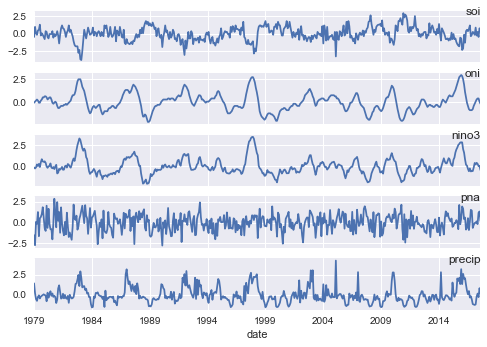

In [6]:
i = 1
fig = pyplot.figure()
for col in df.columns.tolist():
    fig.add_subplot(len(df.columns.tolist()), 1, i)
    df[col].plot()
    # pyplot.plot(values[:, i-1])
    pyplot.title(col, y=0.8, loc='right')
    if i != len(df.columns.tolist()):
    # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
        pyplot.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off') # labels along the bottom edge are off
        # pyplot.xticks([], [])
        pyplot.xlabel('')
    i += 1
pyplot.show()

### Examine data pattern through 1. Fourier transformation

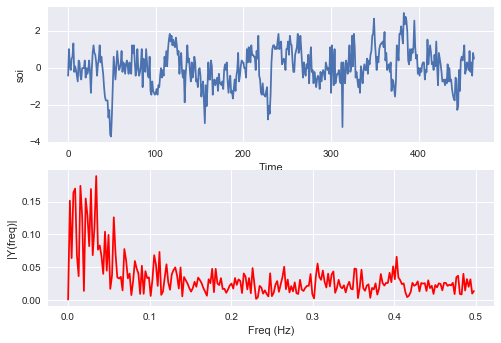

In [7]:
# fft: https://plot.ly/matplotlib/fft/
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fftfreq.html
soi = df['soi'].values
n = len(soi)
Y = np.fft.fft(soi)/n
Y = Y[range(int(n/2))]

timestep = 1.0
frq = np.fft.fftfreq(n, d=timestep)
frq = frq[range(int(n/2))]

fig, ax = pyplot.subplots(2, 1)
ax[0].plot(soi)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('soi')
ax[1].plot(frq, abs(Y), 'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

### Examine data pattern through 2. autocorrelation

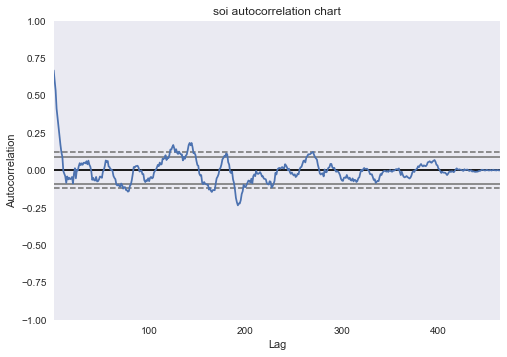

In [9]:
pyplot.figure();
autocorrelation_plot(df.soi)
pyplot.title('soi autocorrelation chart')

As the autocorrelation chart shows, SOI is correlated from 0~10.

### Examine data pattern through 2. heatmap made up of correlation of different variables

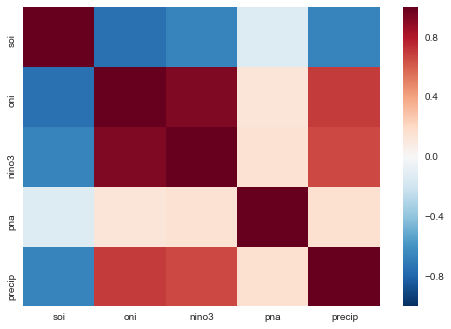

In [11]:
pyplot.figure()
df_cor = df.corr()
sns.heatmap(df_cor)

As the heatmap shows, SOI is most correlated with ONI, nino3, and precipitation (no lag).